# My Toolbox for Data Visualization
This is a basic set of visualization tools and techniques that I use for prelimenary dataset visualization and analysis.

In [1]:
# Pandas is a feature-rich Python library to help process tabular data. 
# Numpy supports processing of multi-dimensional arrays, and comes with a vast 
# collection of high-level mathematical functions 

import pandas as pd
import numpy as np

# matplotlib and seaborn are libraries for creating static or interactive visualizations of tabular data.

import matplotlib.pyplot as plt
import seaborn as sns

# the missingno library helps visualize distribution of missing data in tabular datasets

import missingno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the Dataset

I will use the popular Titanic Passengers dataset to visualize

In [2]:
# import the training and testing datasets into train_df and test_df pandas dataframes. your file path may vary.

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# let's find out some basic metadata info about the training dataset. Columns with less than 891 values suggest 
# the presence of missing data.

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# let's discover basic stats about the training dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


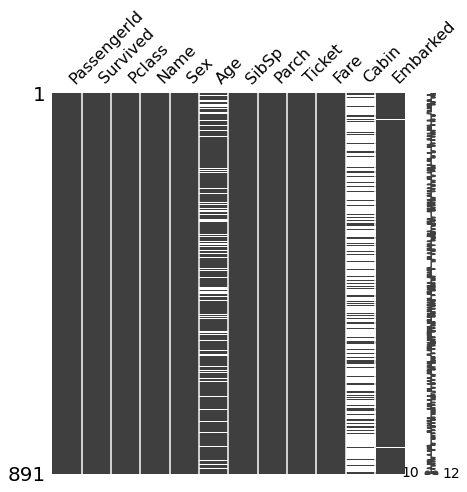

In [5]:
# identifying and remediating missing values in datasets is a key stage in data preparations.
# this is a heat map for missing data in the Titanic training dataset. 
# Age and Cabin show significant percentage of missing data, confirming findings from the dataset metadata above. 
# numerous techniques and algorithms exist for handling missing data.

missingno.matrix(train_df, figsize = (7,7))


In [6]:
# here's a numeric counts of missing data in the training dataset. 
# Cabin and Age will need more processing to deal with missing data

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64

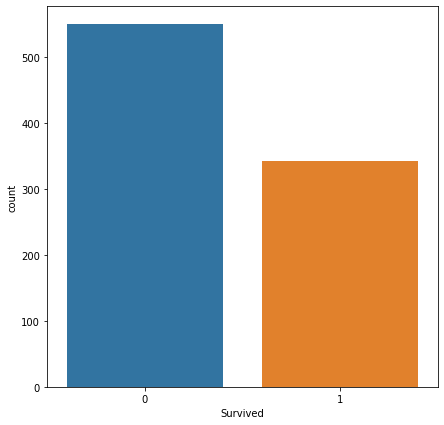

In [7]:
# visualize Survivors count

plt.figure(figsize=(7,7)) # set desired figuer size
sns.countplot(x='Survived', data=train_df); # map column/feature to axis, in this case x

train_df.Survived.value_counts() # count survivors (value 1) and non-survivors (value 0)


male      577
female    314
Name: Sex, dtype: int64

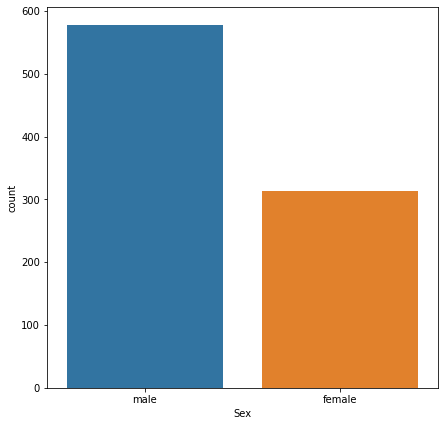

In [8]:
# visualize the count of the Sex column/feature. 

plt.figure(figsize=(7,7))
sns.countplot(x="Sex", data=train_df);
train_df.Sex.value_counts() # count gender of passengers in the training dataset 


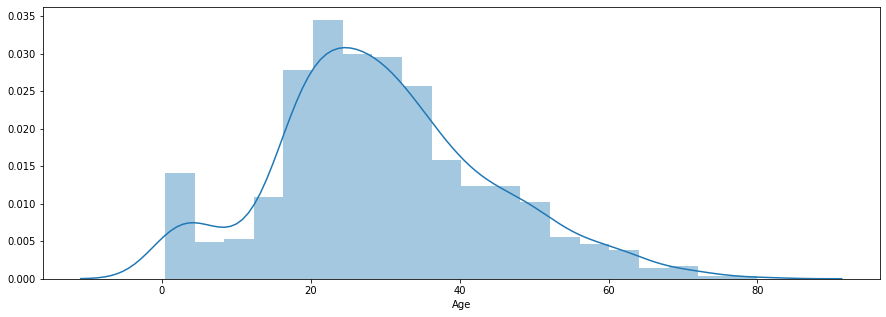

In [9]:
# lets get a distribution plot of the Age column/feature. It seems close to normal distribution

plt.figure(figsize=(15,5))
sns.distplot(train_df.Age)

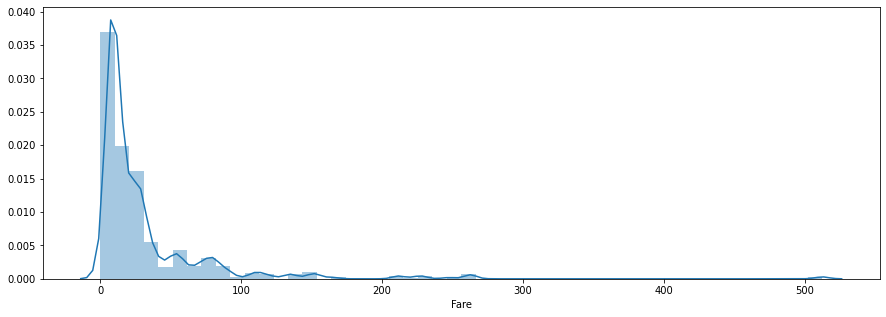

In [10]:
# lets get a distribution plot of the Fare column/feature. 

plt.figure(figsize=(15,5))
sns.distplot(train_df.Fare)

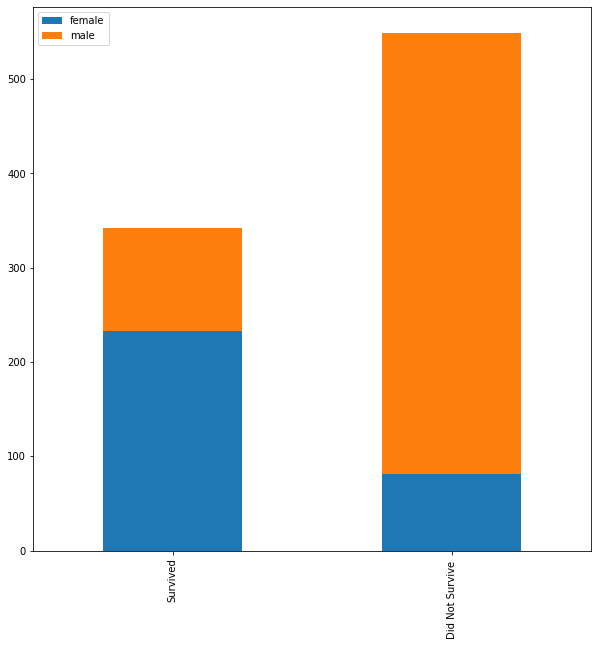

In [11]:
# how about if we compare the gender (Sex) features against the Survived feature

contrast_with="Sex" # column/feature to compare against Survived value
survived = train_df[train_df['Survived']==1][contrast_with].value_counts()
didnotsurvive = train_df[train_df['Survived']==0][contrast_with].value_counts()
temp_df = pd.DataFrame([survived, didnotsurvive]) # create a scrtach dataframe
temp_df.index = ['Survived','Did Not Survive ']
temp_df.plot(kind='bar',stacked=True, figsize=(10,10))

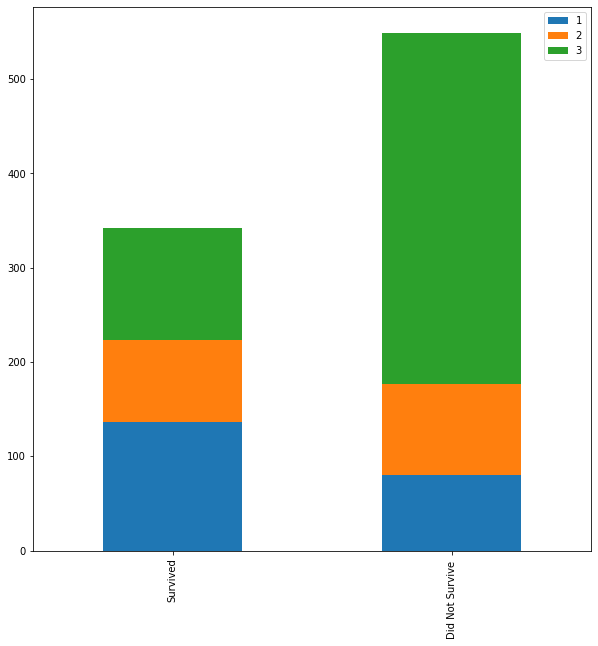

In [12]:
  # how about if we compare the Pclass (Passenger Class) feature against the Survived column/feature 

  contrast_with="Pclass" # Survived column/feature to compare against Pclass value
  survived = train_df[train_df['Survived']==1][contrast_with].value_counts()
  didnotsurvive = train_df[train_df['Survived']==0][contrast_with].value_counts()
  temp_df = pd.DataFrame([survived, didnotsurvive]) # create a scrtach dataframe
  temp_df.index = ['Survived','Did Not Survive ']
  temp_df.plot(kind='bar',stacked=True, figsize=(10,10))

In [13]:
# Correlation is a statistical tool to detect if two variables are related. 
# Pandas df.corr() method is used to analyze correlations and generate a correlation matrix. 
# the closer the value to 1, the higher the co-relation. 

# In this example, so much data prep is needed to generte a more meangful correlation matrix.
# You can convert non-numeric values to numeric values, such as the column Sex, to get a more 
# meaningful outcome. Also, columns such  as PassengerID should be dropped since they 
# do not seem to add statistical significance. 

train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


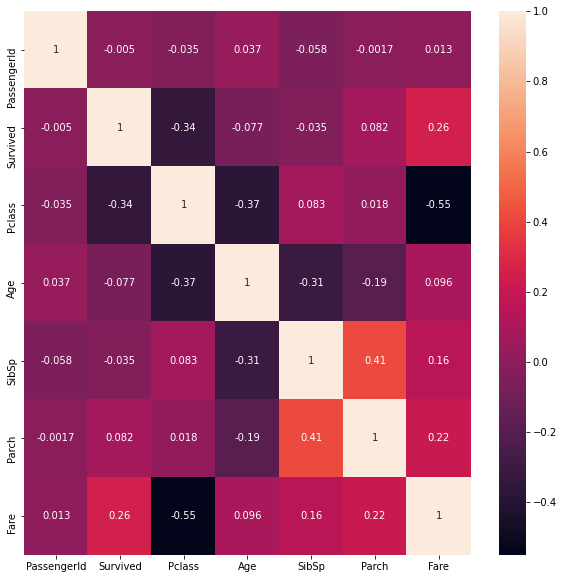

In [14]:
# how about if we generate a heatmap of the features correlations
 
corr= train_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

for advanced visualization techniques, I will publish a followup guide in the near future.

author: Mike Bitar